In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:
data=pd.read_excel('bankruptcy-prevention.xlsx')

In [22]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [24]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data.shape

(250, 7)

In [26]:
#let us check the Target variable
data['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

# Visualization

Text(0.5, 1.0, 'Target')

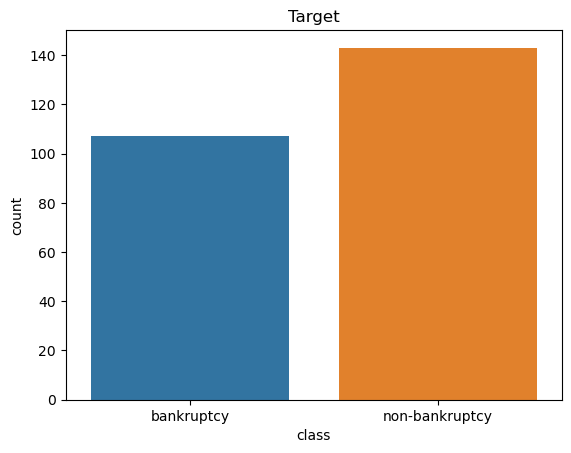

In [27]:
sns.countplot(x=data['class'])
plt.title('Target')

<Axes: xlabel='operating_risk'>

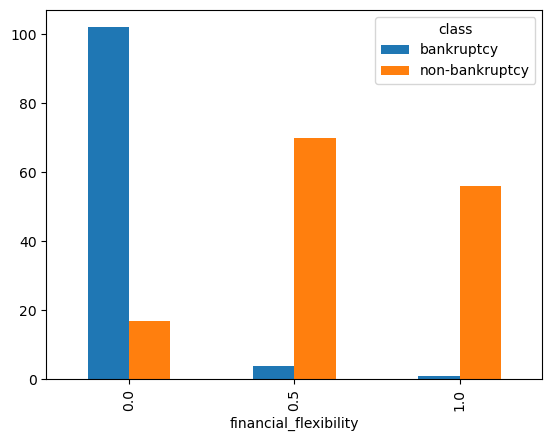

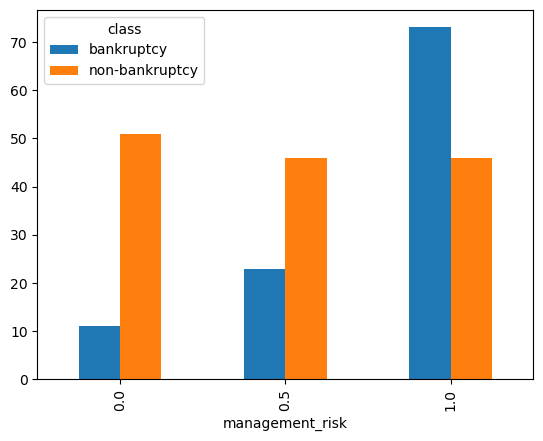

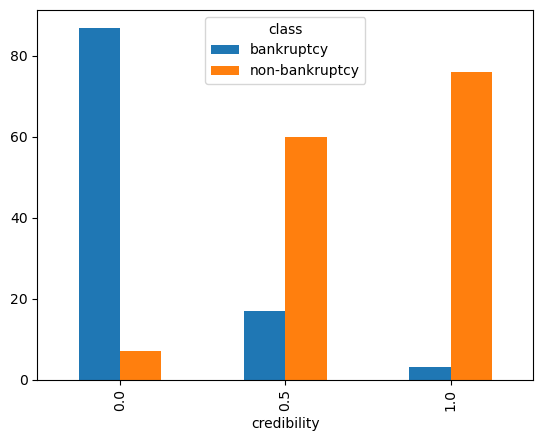

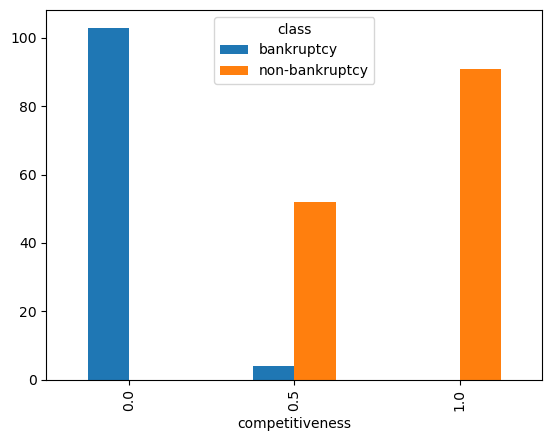

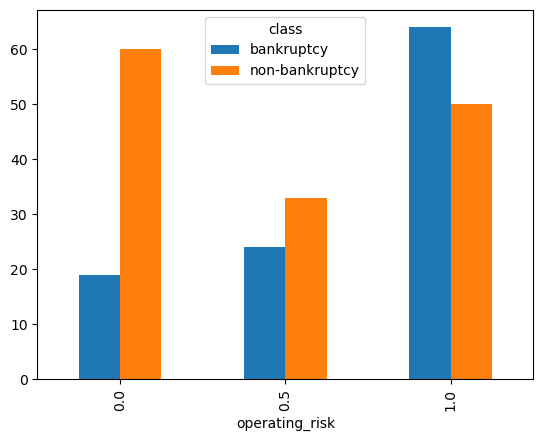

In [30]:
pd.crosstab(data['financial_flexibility'], data['class']).plot(kind = 'bar')
pd.crosstab(data['management_risk'], data['class']).plot(kind = 'bar')
pd.crosstab(data['credibility'], data['class']).plot(kind = 'bar')
pd.crosstab(data['competitiveness'], data['class']).plot(kind = 'bar')
pd.crosstab(data['operating_risk'], data['class']).plot(kind = 'bar')

# Boxplot

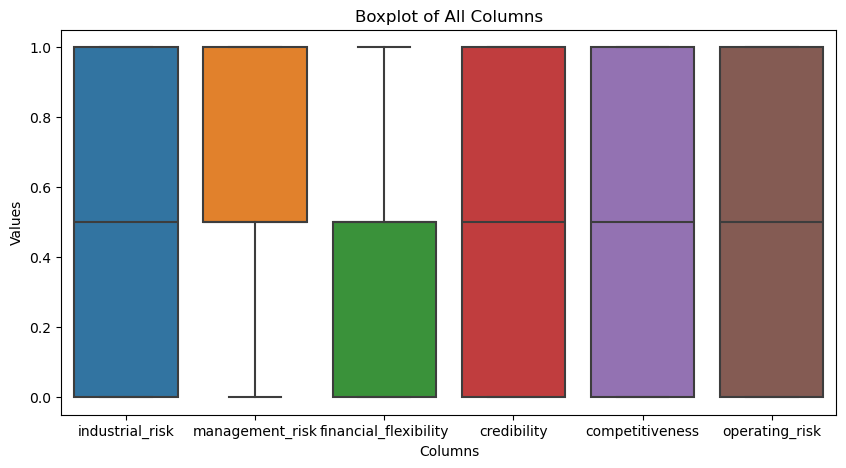

In [31]:
df=data.iloc[:,:6]
plt.figure(figsize=(10,5))
sns.boxplot(df)
# Customize plot (optional)
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()


# Label Encoding the Target Column

In [32]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [33]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
## split the data into train and test
X=data.iloc[:,:6]
Y=data.iloc[:,6]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.20, stratify=Y,random_state=42)

In [35]:
y_test

184    1
52     0
71     0
97     0
23     0
147    1
171    1
92     0
168    1
20     0
14     0
51     0
154    1
2      0
118    1
86     0
120    1
196    1
209    1
37     0
143    1
153    1
249    1
87     0
133    1
141    1
90     0
95     0
21     0
102    0
237    1
207    1
241    1
178    1
134    1
205    1
109    1
139    1
247    1
82     0
111    1
229    1
210    1
60     0
225    1
74     0
29     0
107    1
115    1
1      0
Name: class, dtype: int32

In [36]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
38,1.0,1.0,0.0,0.5,0.0,0.5
15,0.5,1.0,0.0,0.0,0.0,0.5
204,0.0,0.5,0.5,1.0,1.0,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0
72,1.0,0.5,1.0,0.5,0.0,0.0
...,...,...,...,...,...,...
75,1.0,1.0,0.0,0.0,0.0,0.5
5,1.0,1.0,0.0,0.5,0.0,0.5
240,0.0,1.0,0.5,0.5,0.5,0.0
189,0.5,0.0,1.0,1.0,1.0,0.0


In [37]:
x_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
184,0.5,0.0,0.5,1.0,0.5,0.0
52,1.0,0.0,0.0,0.0,0.0,1.0
71,1.0,1.0,0.0,0.0,0.0,1.0
97,1.0,1.0,0.0,0.5,0.0,0.5
23,1.0,0.5,0.0,0.0,0.0,0.0
147,0.5,0.5,0.5,0.5,1.0,1.0
171,0.0,1.0,0.0,1.0,1.0,0.5
92,0.5,1.0,0.0,0.0,0.0,0.5
168,0.5,0.5,0.5,1.0,1.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 6), (200,), (50, 6), (50,))

# Models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score,RocCurveDisplay

# 1.Logistic Model

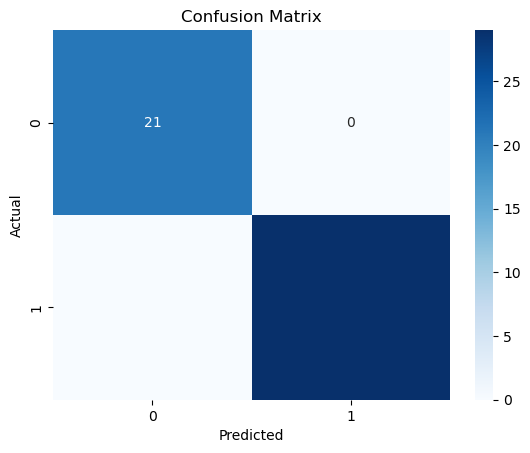

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



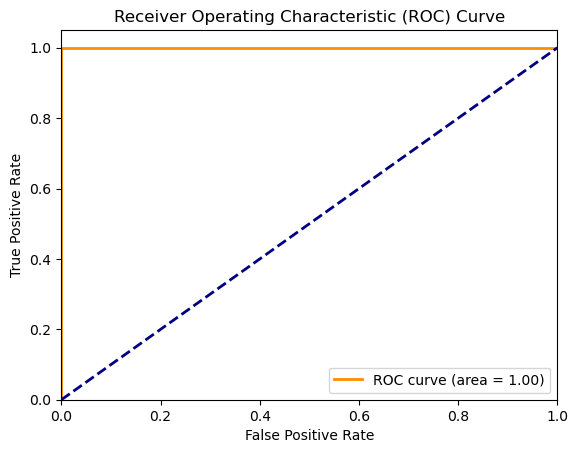

AUC Score: 1.0


In [40]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
y_pred
y_pred_proba = model1.predict_proba(x_test)[:, 1]

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Generate and display the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 2.Random Forest

Accuracy: 1.0


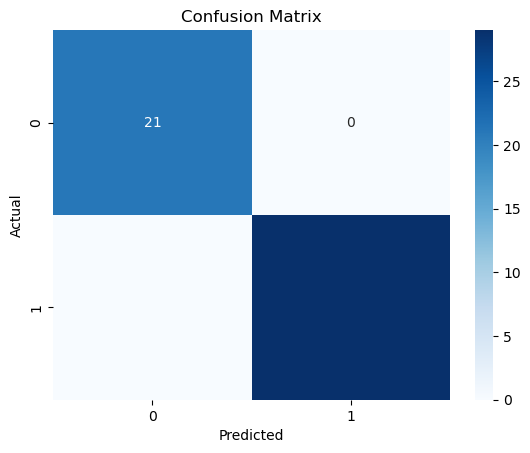

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



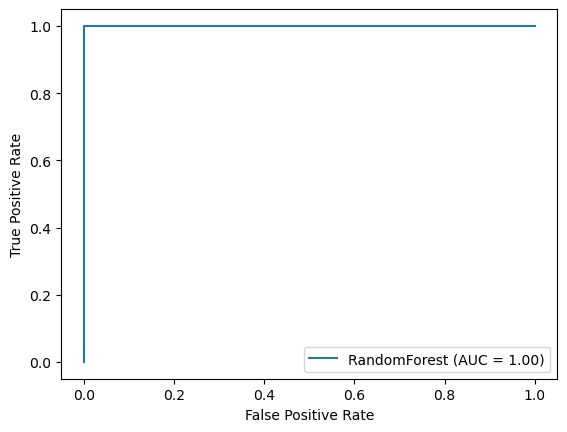

Accuracy:  1.0


In [41]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model2.predict(x_test)
y_prob = model2.predict_proba(x_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForest').plot()
plt.show()
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# 3.Decision Tree

Accuracy: 1.0


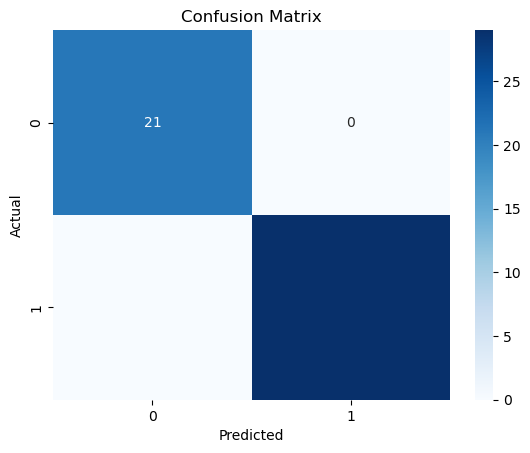

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



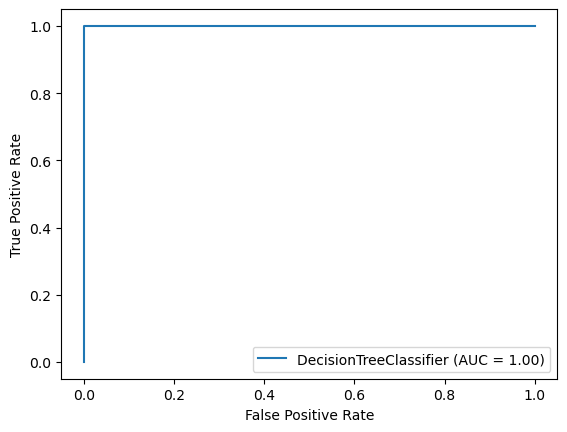

In [42]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
# Predict on the test set
y_pred = model3.predict(x_test)
y_pred_proba = model3.predict_proba(x_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='DecisionTreeClassifier').plot()
plt.show()

# 4. SVM

Accuracy: 1.0


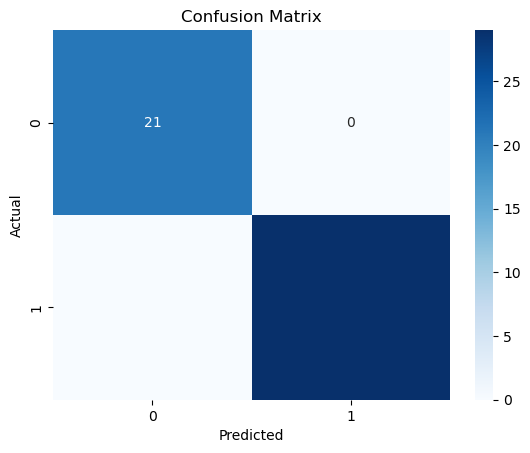

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



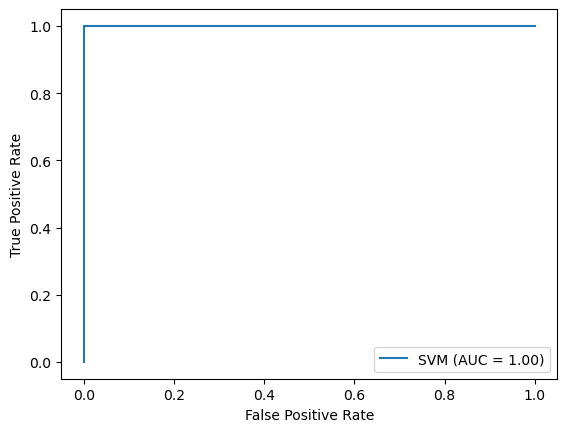

In [43]:
model4 = SVC(kernel='linear', probability=True, random_state=42)
model4.fit(x_train, y_train)
# Step 3: Make predictions and evaluate
y_pred = model4.predict(x_test)
y_prob = model4.predict_proba(x_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM').plot()
plt.show()

# 5.KNN

Accuracy: 1.0


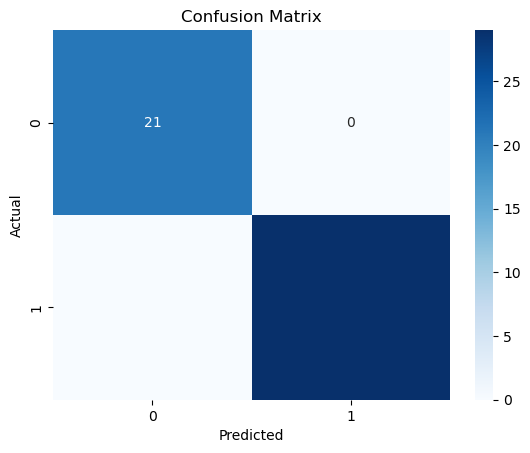

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



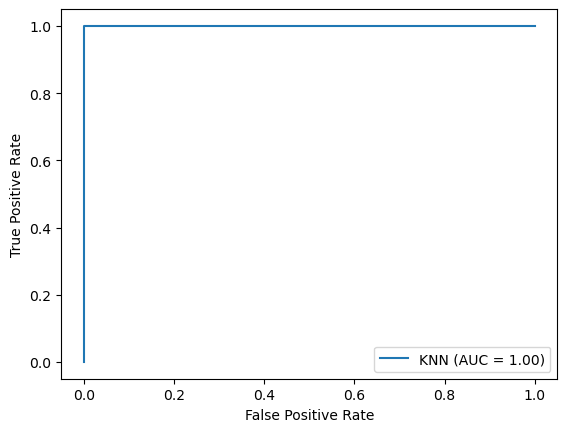

In [44]:
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(x_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model5.predict(x_test)
y_prob = model5.predict_proba(x_test)[:, 1]

# Accuracy
accuracy6 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy6}')
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN').plot()
plt.show()

# 6.Naive Bayes

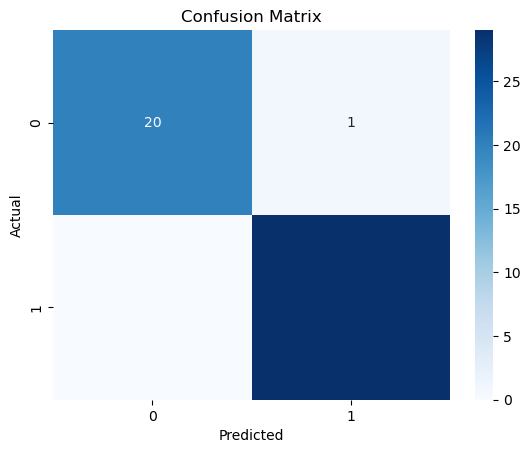

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



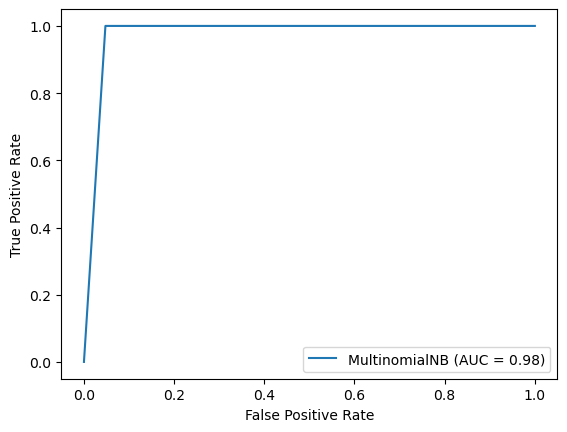

Accuracy:  0.98


In [45]:
model6 = MultinomialNB()
model6.fit(x_train, y_train)


# Predict on the test set
y_pred = model6.predict(x_test)
y_pred_proba = model6.predict_proba(x_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)




# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MultinomialNB').plot()
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# 7.ANN

Epoch 1/50
5/5 [==============================] - 2s 76ms/step - loss: 0.6937 - accuracy: 0.5688 - val_loss: 0.6789 - val_accuracy: 0.7500
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6546 - accuracy: 0.8188 - val_loss: 0.6486 - val_accuracy: 0.8000
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6181 - accuracy: 0.8813 - val_loss: 0.6162 - val_accuracy: 0.8500
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5837 - accuracy: 0.9250 - val_loss: 0.5814 - val_accuracy: 0.8500
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 0.5469 - accuracy: 0.9438 - val_loss: 0.5460 - val_accuracy: 0.8500
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5087 - accuracy: 0.9750 - val_loss: 0.5063 - val_accuracy: 0.9500
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4674 - accuracy: 0.9688 - val_loss: 0.4626 - val_accuracy: 0.9500
Epoch 8/50
5/5 [===========

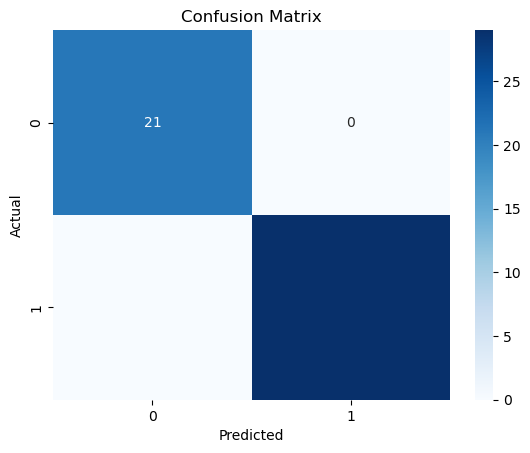

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



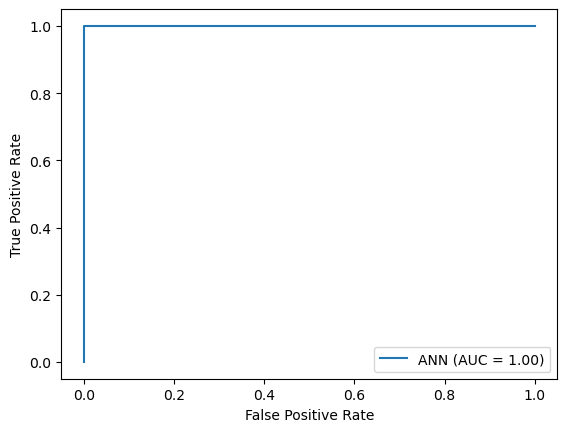

Accuracy:  1.0


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 3. Define the ANN Model Architecture
model7 = Sequential()
model7.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model7.add(Dense(units=32, activation='relu'))
model7.add(Dense(units=1, activation='sigmoid'))
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model7.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 6. Evaluate the Model on the Test Set
y_pred = model7.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ANN').plot()
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Deployment

In [50]:
import pickle

In [51]:
file='random1.pkl'

In [52]:
pickle.dump(model2,open(file,'wb'))